# DATASET

I use a public dataset of monthly carbon dioxide emissions from electricity generation available at the Energy Information Administration and Jason McNeill. The dataset includes CO2 emissions from each energy resource starting January 1973 to July 2016 for reference click [here](https://www.kaggle.com/txtrouble/carbon-emissions/data). 

# Import libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 16

In [2]:
import warnings
import itertools
warnings.filterwarnings("ignore") # specify to ignore warning messages

# Data cleaning

First, in the following cells, we will retrive the monthly CO2 emissions dataset then we will visualize the dataset to decide the type of model we will use to model and analyse our time series (ts).

## Time series dataset retrieving

In [3]:
df = pd.read_csv("co2/MER_T12_06.csv")
df.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLEIEUS,197301,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,CLEIEUS,197302,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,CLEIEUS,197303,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,CLEIEUS,197304,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,CLEIEUS,197305,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 6 columns):
MSN             5094 non-null object
YYYYMM          5094 non-null int64
Value           5094 non-null object
Column_Order    5094 non-null int64
Description     5094 non-null object
Unit            5094 non-null object
dtypes: int64(2), object(4)
memory usage: 238.9+ KB


The dataset has 6 columns where 2 of them are integer data type and 4 objects and 5096 observations. The above dataset retriving method only retrives the dataset as a dataframe that is not as a time series dataset. To read the dataset as a time series, we have to pass special arguments to the read_csv command as given below.

In [5]:
dateparse = lambda x: pd.to_datetime(x, format='%Y%m', errors = 'coerce')
df = pd.read_csv("co2/MER_T12_06.csv", parse_dates=['YYYYMM'], index_col='YYYYMM', date_parser=dateparse) 
df.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


The arguments can be explained:
- parse_dates: This is a key to identify the date time column. Example, the column name is ‘YYYYMM’.
- index_col: This is a key that forces pandas to use the date time column as index.
- date_parser: Converts an input string into datetime variable.

In [6]:
df.head(15)

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-06-01,CLEIEUS,66.538,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-07-01,CLEIEUS,72.626,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-08-01,CLEIEUS,75.181,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-09-01,CLEIEUS,68.397,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


Total sum of CO2 emission from each energy group for every year is given as an observation that can be viewed in the NaT row. So, let us first identify and drop the non datetimeindex rows and also use ts to refere the time series dataset instead of the dataframe df. First, let us convert the index to datetime, coerce errors, and filter NaT

In [7]:
ts = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]
ts.head(15)

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-06-01,CLEIEUS,66.538,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-07-01,CLEIEUS,72.626,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-08-01,CLEIEUS,75.181,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-09-01,CLEIEUS,68.397,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [8]:
ts.dtypes

MSN             object
Value           object
Column_Order     int64
Description     object
Unit            object
dtype: object

As we can see from the ts data type, the emission value is represented as an object. Let us first convert the emision value into numeric value as follows

In [9]:
#ss = ts.copy(deep=True)
ts['Value'] = pd.to_numeric(ts['Value'] , errors='coerce')
ts.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [10]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4707 entries, 1973-01-01 to 2016-07-01
Data columns (total 5 columns):
MSN             4707 non-null object
Value           4323 non-null float64
Column_Order    4707 non-null int64
Description     4707 non-null object
Unit            4707 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 220.6+ KB


4323 observations have emissions value and therefore, we need to drop the empty rows emissions value. 

In [11]:
ts.dropna(inplace = True)

# Natural gas CO2 emission analysis

For developing the time series model and make forcasting, I will use the natural gas CO2 emission from the electirical power generetion. First, let us slice this data from the ts as follows:  

In [12]:
Emissions = ts.iloc[:,1:]   # Monthly total emissions (mte)
Emissions= Emissions.groupby(['Description', pd.TimeGrouper('M')])['Value'].sum().unstack(level = 0)
Emissions.head()

Description,Coal Electric Power Sector CO2 Emissions,"Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions",Geothermal Energy Electric Power Sector CO2 Emissions,Natural Gas Electric Power Sector CO2 Emissions,Non-Biomass Waste Electric Power Sector CO2 Emissions,Petroleum Coke Electric Power Sector CO2 Emissions,Petroleum Electric Power Sector CO2 Emissions,Residual Fuel Oil Electric Power Sector CO2 Emissions,Total Energy Electric Power Sector CO2 Emissions
YYYYMM,,,,,,,,,
1973-01-31,72.076,2.375,NaN,12.175,NaN,0.128,27.369,24.867,111.621
1973-02-28,64.442,2.061,NaN,11.708,NaN,0.106,23.034,20.867,99.185
1973-03-31,64.084,1.171,NaN,13.994,NaN,0.083,21.034,19.780,99.112
1973-04-30,60.842,1.022,NaN,14.627,NaN,0.130,17.714,16.562,93.183
1973-05-31,61.798,0.949,NaN,17.344,NaN,0.167,18.870,17.754,98.012


In [13]:
mte = Emissions['Natural Gas Electric Power Sector CO2 Emissions'] # monthly total emissions (mte)
mte.head()

YYYYMM
1973-01-31    12.175
1973-02-28    11.708
1973-03-31    13.994
1973-04-30    14.627
1973-05-31    17.344
Freq: M, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

## Test Stationary

In [14]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

## Graphycally test stationary

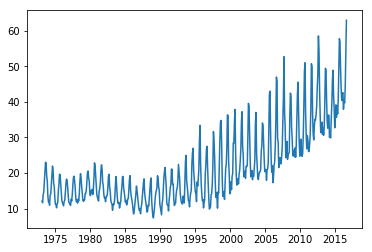

In [15]:
plt.plot(mte)

From the figures, it is evident that there is a trend in the CO2 emission dataset with seasonal variation. So, we can infer a concluding remark that the dataset is not stationary.

## Test  stationary using Dickey-Fuller

In [16]:
def TestStationaryPlot(ts):
    rol_mean = ts.rolling(window = 12, center = False).mean()
    rol_std = ts.rolling(window = 12, center = False).std()
    
    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks()
    plt.yticks()
    
    plt.xlabel('Time in Years')
    plt.ylabel('Total Emissions')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block= True)

In [17]:
def TestStationaryAdfuller(ts, cutoff = 0.01):
    ts_test = adfuller(ts, autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        

### Testing the monthly emissions time series

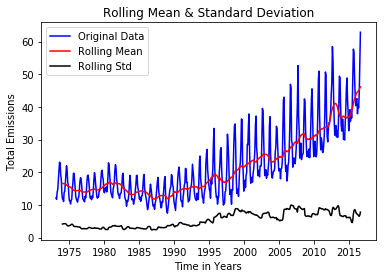

In [18]:
TestStationaryPlot(mte)

In [19]:
TestStationaryAdfuller(mte)

Test Statistic                   1.831215
p-value                          0.998409
#Lags Used                      19.000000
Number of Observations Used    503.000000
Critical Value (1%)             -3.443418
Critical Value (5%)             -2.867303
Critical Value (10%)            -2.569840
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


The emissions mean and the variation in standard deviation (black line) clearly vary with time. This shows that the series has a trend. So, it is not a stationary. Also, the Test Statistic is greater than the critical values with 90%, 95% and 99% confidence levels. Hence, no evidence to reject the null hypothesis. Therefore the series is nonstationary. 

## Transform the dataset to stationary

The most common techniques used to estimate or model trend and then remove it from the time series are 
- Aggregation – taking average for a time period like monthly/weekly average
- Smoothing – taking rolling averages
- Polynomial Fitting – fit a regression model

## A) Moving average

In this technique, we take average of ‘k’ consecutive values depending on the frequency of time series (in this case 12 monthes per year). Here, we will take the average over the past 1 year.

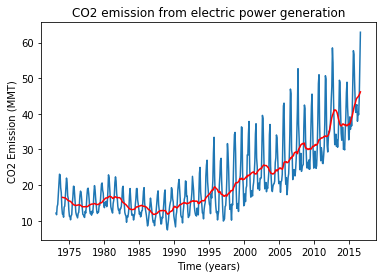

In [20]:
moving_avg = mte.rolling(12).mean()
plt.plot(mte)
plt.plot(moving_avg, color='red')
plt.xlabel('Time (years)')
plt.ylabel('CO2 Emission (MMT)')
plt.title('CO2 emission from electric power generation')
plt.show()

The red line shows the rolling mean. Subtract the moving average from the original series. Note that since we are taking average of last 12 values, rolling mean is not defined for first 11 values. 

In [21]:
mte_moving_avg_diff = mte - moving_avg
mte_moving_avg_diff.head(13)

YYYYMM
1973-01-31         NaN
1973-02-28         NaN
1973-03-31         NaN
1973-04-30         NaN
1973-05-31         NaN
1973-06-30         NaN
1973-07-31         NaN
1973-08-31         NaN
1973-09-30         NaN
1973-10-31         NaN
1973-11-30         NaN
1973-12-31   -4.705333
1974-01-31   -4.594333
Freq: M, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

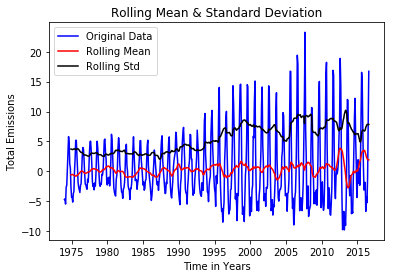

In [22]:
mte_moving_avg_diff.dropna(inplace=True)
TestStationaryPlot(mte_moving_avg_diff)

In [23]:
TestStationaryAdfuller(mte_moving_avg_diff)

Test Statistic                  -5.138977
p-value                          0.000012
#Lags Used                      19.000000
Number of Observations Used    492.000000
Critical Value (1%)             -3.443711
Critical Value (5%)             -2.867432
Critical Value (10%)            -2.569908
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


The rolling mean values appear to be varying slightly. The Test Statistic is smaller than the 10% 5%, and 1% of critical values. So, we can say with 99% confidence level that the dataset is a stationary series.

## B). Exponentail weighted moving average

Another technique is to take the ‘weighted moving average’ where more recent values are given a higher weight. The popular method to assign the weights is using the exponential weighted moving average. Where weights are assigned to all previous values with a decay factor.

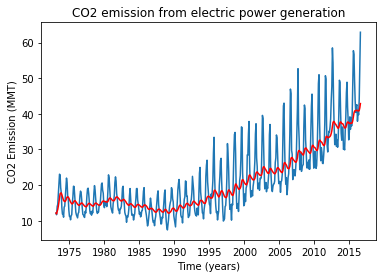

In [24]:
mte_exp_wighted_avg = mte.ewm(halflife=12).mean()
plt.plot(mte)
plt.plot(mte_exp_wighted_avg, color='red')
plt.xticks()
plt.yticks()
plt.xlabel('Time (years)')
plt.ylabel('CO2 Emission (MMT)')
plt.title('CO2 emission from electric power generation')
plt.show()

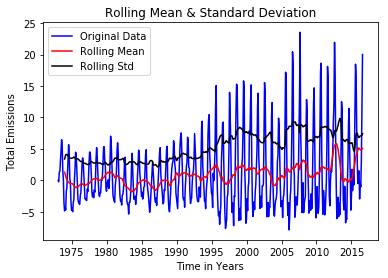

In [25]:
mte_ewma_diff = mte - mte_exp_wighted_avg
TestStationaryPlot(mte_ewma_diff)

In [26]:
TestStationaryAdfuller(mte_ewma_diff)

Test Statistic                  -3.423915
p-value                          0.010170
#Lags Used                      19.000000
Number of Observations Used    503.000000
Critical Value (1%)             -3.443418
Critical Value (5%)             -2.867303
Critical Value (10%)            -2.569840
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


This time series has lesser variations in mean and standard deviation compared to the orginal ddataset. Also, the Test Statistic is smaller than the 5% and 10% critical value, which is better than the original case. There will be no missing values as all values from starting are given weights. So, it will work even with no previous values. In this case, we can say with 95% confidence level the series is a stationary series.

## C) Eliminating trend and seasonality: Differencing

One of the most common method of dealing with both trend and seasonality is differencing. In this technique, we take the difference of the original observation at a particular instant with that at the previous instant. This mostly works well to improve stationarity. First order differencing can be done as follows:

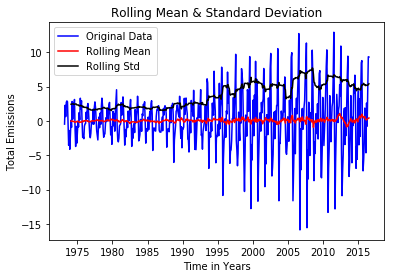

In [27]:
mte_first_difference = mte - mte.shift(1)  
TestStationaryPlot(mte_first_difference.dropna(inplace=False))

In [28]:
TestStationaryAdfuller(mte_first_difference.dropna(inplace=False))

Test Statistic                  -5.435116
p-value                          0.000003
#Lags Used                      18.000000
Number of Observations Used    503.000000
Critical Value (1%)             -3.443418
Critical Value (5%)             -2.867303
Critical Value (10%)            -2.569840
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


The first difference improves the stationarity of the series significantly. Let us use also the ***seasonal difference*** to remove the seasonality of the data and see how that impacts stationarity of the data.

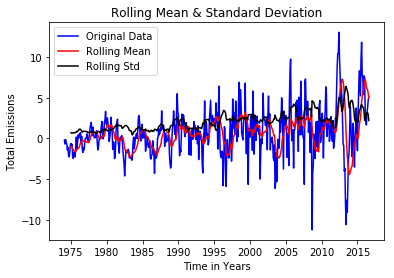

Test Statistic                  -4.412396
p-value                          0.000282
#Lags Used                      13.000000
Number of Observations Used    497.000000
Critical Value (1%)             -3.443576
Critical Value (5%)             -2.867373
Critical Value (10%)            -2.569877
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [29]:
mte_seasonal_difference = mte - mte.shift(12)  
TestStationaryPlot(mte_seasonal_difference.dropna(inplace=False))
TestStationaryAdfuller(mte_seasonal_difference.dropna(inplace=False))

Compared to the original data the seasonal difference also improves the stationarity of the series. The next step is to take the first difference of the seasonal difference.

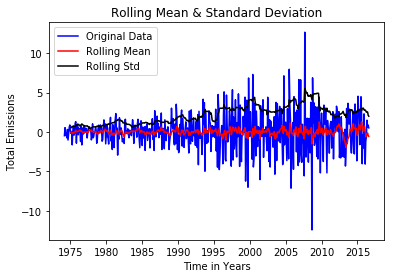

In [30]:
mte_seasonal_first_difference = mte_first_difference - mte_first_difference.shift(12)  
TestStationaryPlot(mte_seasonal_first_difference.dropna(inplace=False))

In [31]:
TestStationaryAdfuller(mte_seasonal_first_difference.dropna(inplace=False))

Test Statistic                -1.009743e+01
p-value                        1.081539e-17
#Lags Used                     1.200000e+01
Number of Observations Used    4.970000e+02
Critical Value (1%)           -3.443576e+00
Critical Value (5%)           -2.867373e+00
Critical Value (10%)          -2.569877e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


Now, if we look the Test Statistic and the p-value, taking the seasonal first difference has made our the time series dataset stationary. This differencing procedure could be repeated for the log values, but it didn’t make the dataset any more stationary.

## D) Eliminating trend and seasonality: Decomposing

In this technique, it statrating by modeling both trend and seasonality and removing them from the model.

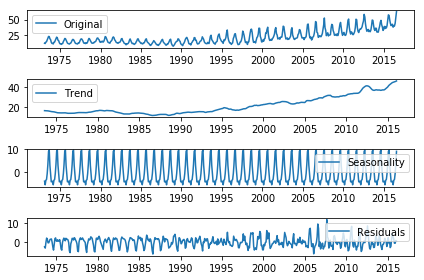

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(mte)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(mte, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Here we can see that the trend, seasonality are separated out from data and we can model the residuals. Lets check stationarity of residuals:

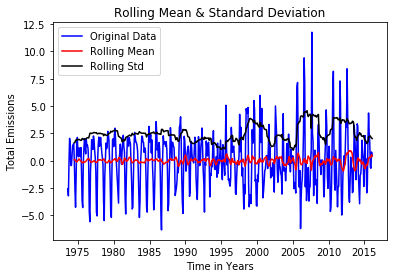

Test Statistic                -8.547084e+00
p-value                        9.439345e-14
#Lags Used                     1.900000e+01
Number of Observations Used    4.910000e+02
Critical Value (1%)           -3.443739e+00
Critical Value (5%)           -2.867444e+00
Critical Value (10%)          -2.569915e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [33]:
mte_decompose = residual
mte_decompose.dropna(inplace=True)
TestStationaryPlot(mte_decompose)
TestStationaryAdfuller(mte_decompose)

# Find optimal parameters and build SARIMA model

## ACF and PACF charts 

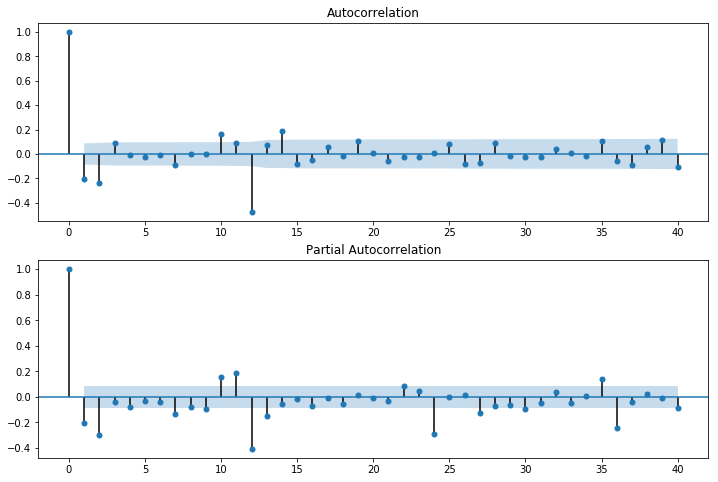

In [34]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(mte_seasonal_first_difference.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(mte_seasonal_first_difference.iloc[13:], lags=40, ax=ax2)

## Grid search 

To find the optimal parameters for ARIMA models using the graphical method is not trivial and it is time consuming. We will select the optimal parameter values systematically using the grid search (hyperparameter optimization) method. The grid search iteratively explore different combinations of the parameters. For each combination of parameters, we will fit a new seasonal ARIMA model with the SARIMAX() function from the statsmodels module and assess its overall quality. Once we have explored the entire landscape of parameters, our optimal set of parameters will be the one that yields the best performance for our criteria of interest. Let's begin by generating the various combination of parameters that we wish to assess:

In [35]:
p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2
pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets
pdq_x_QDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] # Generate all different combinations of seasonal p, q and q triplets
print('Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], pdq_x_QDQs[1]))
print('SARIMAX: {} x {}'.format(pdq[2], pdq_x_QDQs[2]))

Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)



When evaluating and comparing statistical models fitted with different parameters, each can be ranked against one another based on how well it fits the data or its ability to accurately predict future data points. We will use the AIC (Akaike Information Criterion) value, which is conveniently returned with ARIMA models fitted using statsmodels. The AIC measures how well a model fits the data while taking into account the overall complexity of the model. A model that fits the data very well while using lots of features will be assigned a larger AIC score than a model that uses fewer features to achieve the same goodness-of-fit. The lowest AIC  refore, we are interested in finding the model that yields the lowest AIC value.

The order argument specifies the (p, d, q) parameters, while the seasonal_order argument specifies the (P, D, Q, S) seasonal component of the Seasonal ARIMA model. After fitting each SARIMAX()model, the code prints out its respective AIC score.

In [36]:
for param in pdq:
    for seasonal_param in pdq_x_QDQs:
        mod = sm.tsa.statespace.SARIMAX(mte,
                                            order=param,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
        results = mod.fit()
        print('ARIMA{}x{} - AIC:{}'.format(param, seasonal_param, results.aic))

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:4804.065995091217
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:4135.625648186435
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:2572.1947577443707
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:2504.2095028358563
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:2544.1464266167964
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:2465.147262997036
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:2511.043139693216
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:2505.8402380709176
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:4157.5612255157685
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:3572.1059017584885
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:2334.7247254088184
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:2245.507386420786
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:2329.0446013811093
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:2218.6800977523562
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:2262.0627979899496
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:2247.5327721889116
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2932.1335743055993
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:2616.012810818768
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC

SARIMAX(1, 1, 1)x(0, 1, 1, 12) yields the lowest AIC value of 2003.553. Therefore, we will consider this to be optimal option out of all the parameter combinations.W e have identified the set of parameters that produces the best fitting model to our time series data. We can proceed to analyze this particular model in more depth.

In [37]:
mod = sm.tsa.statespace.SARIMAX(mte, 
                                order=(1,1,1), 
                                seasonal_order=(0,1,1,12),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                          Statespace Model Results                                         
Dep. Variable:     Natural Gas Electric Power Sector CO2 Emissions   No. Observations:                  523
Model:                              SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -997.777
Date:                                             Thu, 30 May 2019   AIC                           2003.553
Time:                                                     18:13:52   BIC                           2020.380
Sample:                                                 01-31-1973   HQIC                          2010.158
                                                      - 07-31-2016                                         
Covariance Type:                                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

The coef column shows the weight (i.e. importance) of each feature and how each one impacts the time series. The P>|z| column informs us of the significance of each feature weight. Here, each weight has a p-value close to 0, so it is reasonable to include the features in our model.

When fitting seasonal ARIMA models, it is important to run model diagnostics to ensure that none of the assumptions made by the model have been violated. First, we get a line plot of the residual errors, suggesting that there may still be some trend information not captured by the model.

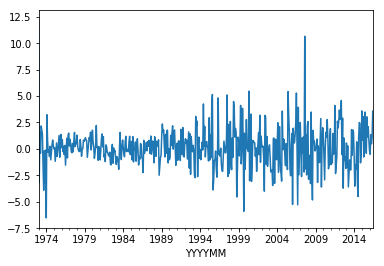

In [38]:
results.resid.plot()

In [39]:
print(results.resid.describe())

count    523.000000
mean       0.144267
std        1.885626
min       -6.528427
25%       -0.791260
50%        0.126975
75%        1.040649
max       12.175000
dtype: float64


The figure displays the distribution of the residual errors. It shows a little bias in the prediction. Next, we get a density plot of the residual error values, suggesting the errors are Gaussian, but may not be centered on zero.

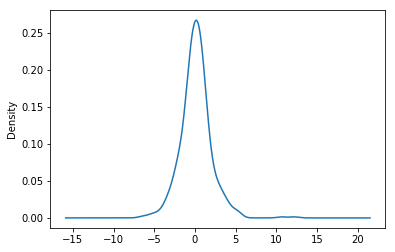

In [40]:
results.resid.plot(kind='kde')

The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behavior.

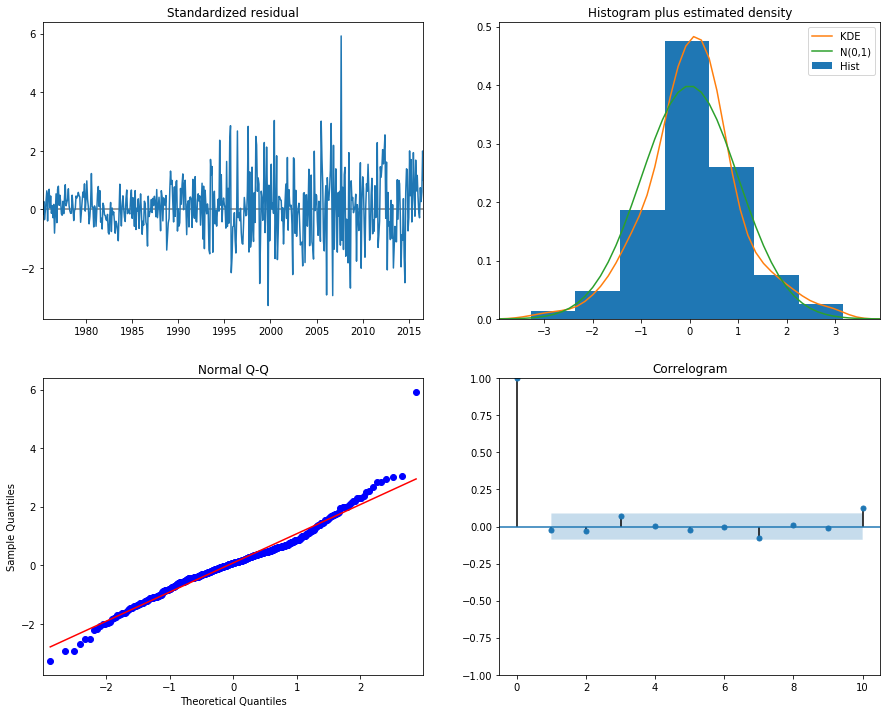

In [41]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

Our primary concern is to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. If the seasonal ARIMA model does not satisfy these properties, it is a good indication that it can be further improved.

The model diagnostic suggests that the model residual is normally distributed based on the following:

- In the top right plot, the red KDE line follows closely with the N(0,1) line. Where, N(0,1) is the standard notation for a normal distribution with mean 0 and standard deviation of 1. This is a good indication that the residuals are normally distributed. The forecast errors deviate somewhat from the straight line, indicating that the normal distribution is not a perfect model for the distribution of forecast errors, but it is not unreasonable.
- The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution. Again, this is a strong indication that the residuals are normally distributed.
- The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

Those observations lead us to conclude that our model produces a satisfactory fit that could help us understand our time series data and forecast future values.

# Validating prediction

We have obtained a model for our time series that can now be used to produce forecasts. We start by comparing predicted values to real values of the time series, which will help us understand the accuracy of our forecast. The [get_prediction()](https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAXResults.get_prediction.html) and conf_int() attributes allow us to obtain the values and associated confidence intervals for forecasts of the time series.

In [42]:
pred = results.get_prediction(start = '2013', end = '2016')
pred_ci = pred.conf_int()
pred_ci.head()

,lower Natural Gas Electric Power Sector CO2 Emissions,upper Natural Gas Electric Power Sector CO2 Emissions
YYYYMM,,
2013-01-31,30.203837,37.257326
2013-02-28,29.088382,36.141871
2013-03-31,28.958987,36.012476
2013-04-30,30.708075,37.761564
2013-05-31,32.104081,39.157570


The dynamic=False argument ensures that we produce one-step ahead forecasts, meaning that forecasts at each point are generated using the full history up to that point.

We can plot the real and forecasted values of the CO2 emission time series to assess how well the model fits.

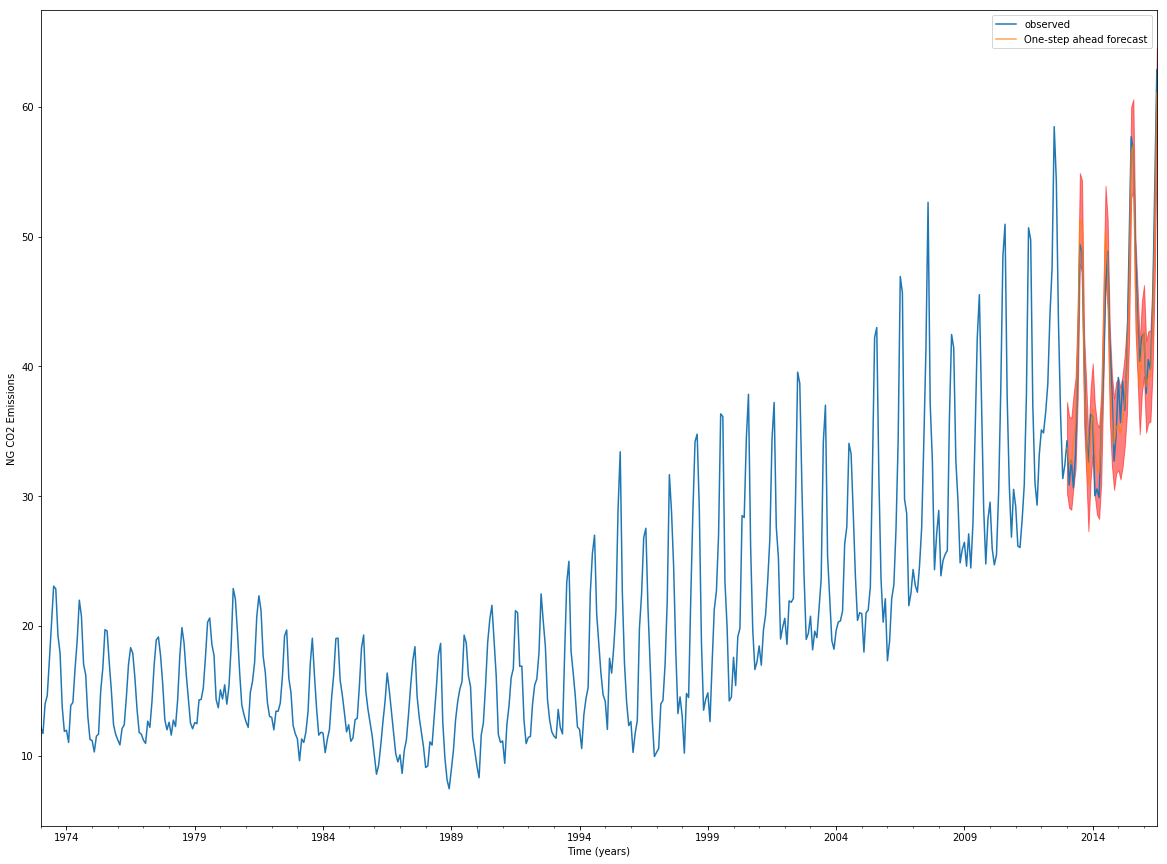

In [43]:
ax = mte['1973':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7, figsize=(20, 15))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.5)

ax.set_xlabel('Time (years)')
ax.set_ylabel('NG CO2 Emissions')
plt.legend()

plt.show()

Overall, our forecasts align with the true values very well, showing an overall similar behavior.

It is also useful to quantify the accuracy of our forecasts. We will use the MSE (Mean Squared Error), which summarizes the average error of our forecasts. For each predicted value, we compute its distance to the true value and square the result. The results need to be squared so that positive/negative differences do not cancel each other out.

In [44]:
mte_forecast = pred.predicted_mean
mte_truth = mte['2013-01-31':]

# Compute the mean square error
mse = ((mte_forecast - mte_truth) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_truth)**2)/len(mte_forecast))))

The Mean Squared Error (MSE) of the forecast is 4.09
The Root Mean Square Error (RMSE) of the forcast: 2.0236


In [45]:
mte_pred_concat = pd.concat([mte_truth, mte_forecast])

The goal of developing the model is to get a good quality predictive power using dynamic forecast. That is, we use information from the time series up to a certain point, and after that, forecasts are generated using values from previous forecasted time points as follows:

In [46]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2013-01-31'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

From, plotting the observed and forecasted values of the time series, we see that the overall forecasts are accurate even when we use the dynamic forecast. All forecasted values (red line) match closely to the orginal observed (blue line) data, and are well within the confidence intervals of our forecast.

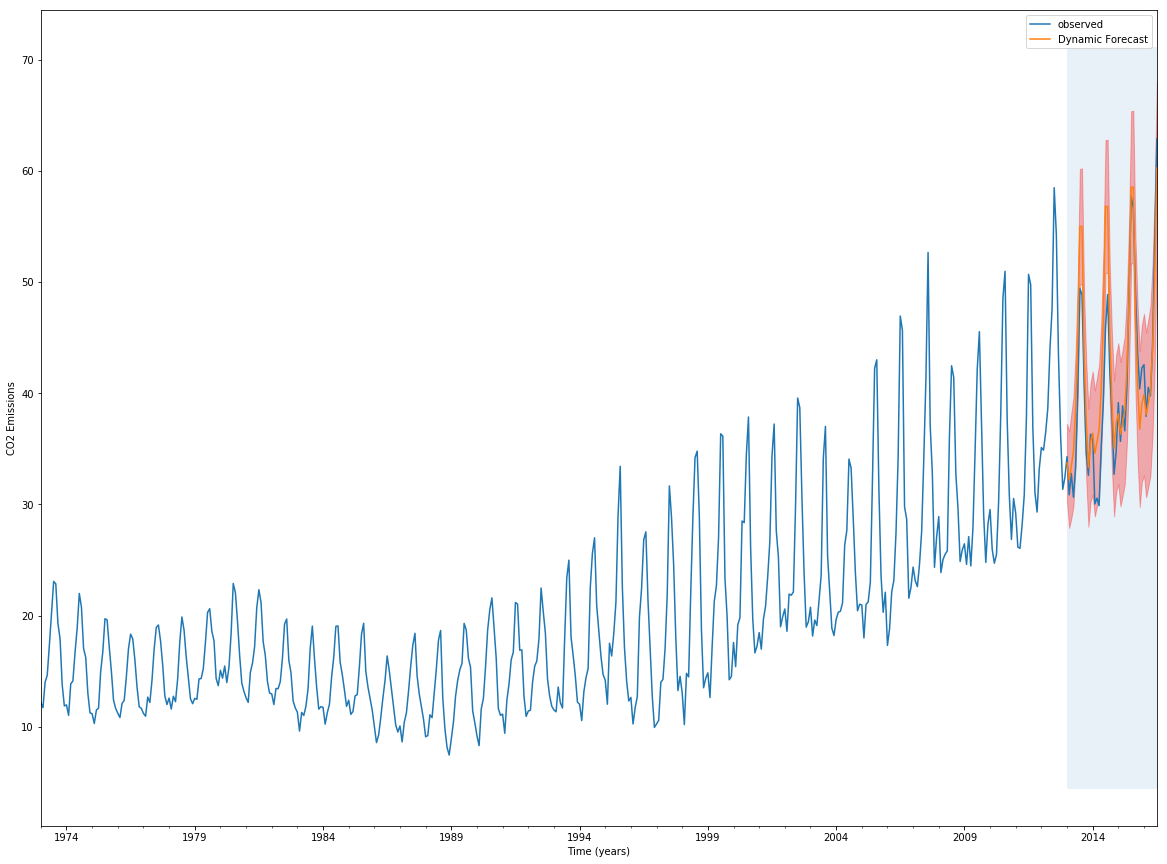

In [47]:
ax = mte['1973':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], 
                color='r', 
                alpha=.3)

ax.fill_betweenx(ax.get_ylim(), 
                 pd.to_datetime('2013-01-31'), 
                 mte.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time (years)')
ax.set_ylabel('CO2 Emissions')

plt.legend()
plt.show()

In [48]:
# Extract the predicted and true values of our time series
mte_forecast = pred_dynamic.predicted_mean
mte_orginal = mte['2013-01-31':]

# Compute the mean square error
mse = ((mte_forecast - mte_orginal) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_orginal)**2)/len(mte_forecast))))

The Mean Squared Error (MSE) of the forecast is 14.39
The Root Mean Square Error (RMSE) of the forcast: 3.7936


# Forecasting

In [49]:
# Get forecast of 10 years or 120 months steps ahead in future
forecast = results.get_forecast(steps= 120)
# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()
forecast_ci.head()

,lower Natural Gas Electric Power Sector CO2 Emissions,upper Natural Gas Electric Power Sector CO2 Emissions
2016-08-31,58.062560,65.116049
2016-09-30,47.316615,55.987495
2016-10-31,40.736074,50.163095
2016-11-30,36.175926,46.010288
2016-12-31,38.095115,48.172700


We can use the output of this code to plot the time series and forecasts of its future values.

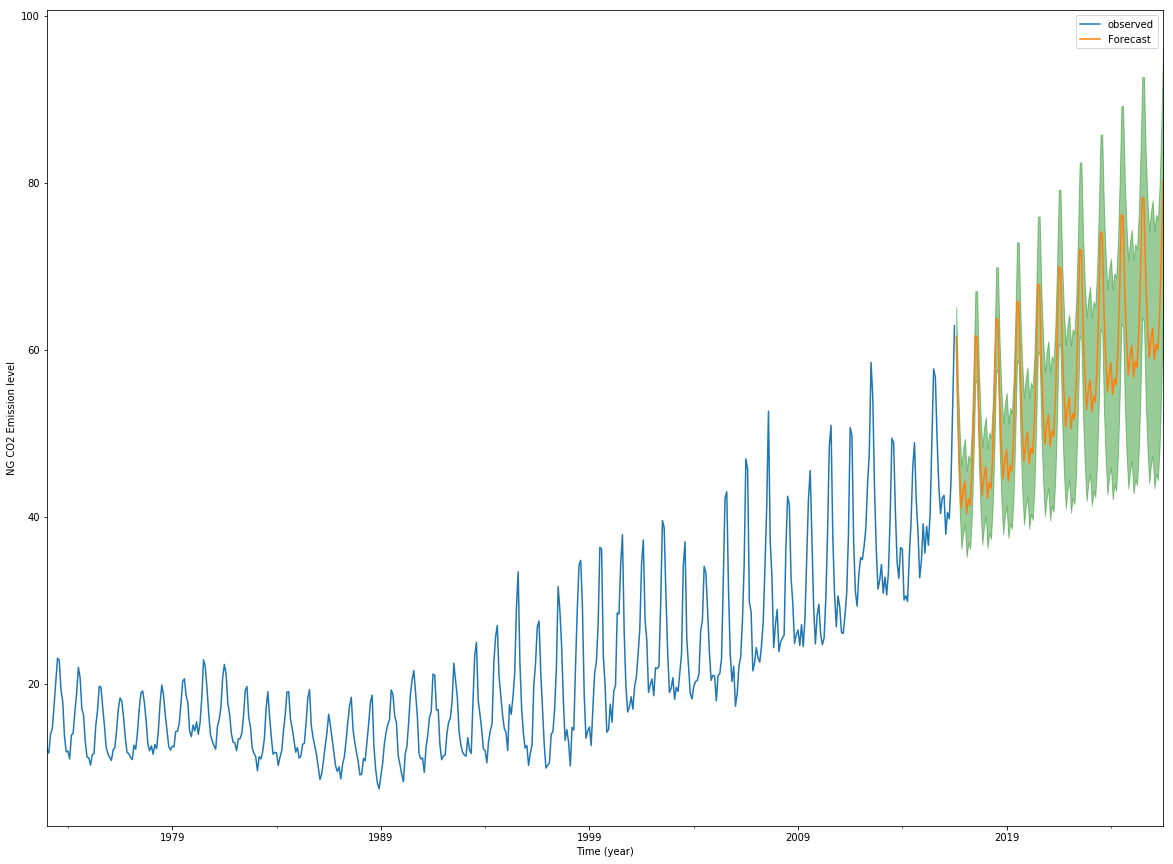

In [50]:
ax = mte.plot(label='observed', figsize=(20, 15))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)
ax.set_xlabel('Time (year)')
ax.set_ylabel('NG CO2 Emission level')

plt.legend()
plt.show()

Both the forecast and associated confidence interval that we have generated can now be used to further explore and understand the time series. The forecast shows that the CO2 emission from natural gas power generation is expected to continue increasing.